Submission Kelas Belajar Machine Learning untuk Pemula <hr>
No. Registrasi: 0182180030-11 <br>
Nama: Dian Kurnia Imanda <br>
Email: diankurniaimanda@gmail.com

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-04 02:26:26--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  30.7MB/s    in 10s     

2021-07-04 02:26:37 (30.0 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# melakukan ekstraksi pada file zip
import zipfile
import os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images/'
os.listdir(base_dir)

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [4]:
train_datagen = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 20, #20
                    horizontal_flip = True,
                    vertical_flip = True,
                    shear_range = 0.2,
                    fill_mode = 'nearest', #wrap, nearest
                    validation_split = 0.4,
                    brightness_range = [0.2,1.0],
                    zoom_range= 0.2
                    #height_shift_range=0.5,
                    #width_shift_range=0.5
                    )
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.4)

In [5]:
train_generator = train_datagen.flow_from_directory(
        base_dir,  # direktori data latih
        target_size=(150, 100),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, #4
        shuffle=True,
        class_mode='categorical', #sparse
        subset='training') 

validation_generator = test_datagen.flow_from_directory(
        base_dir, # direktori data validasi
        target_size=(150, 100), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        shuffle=True,
        class_mode='categorical',
        subset='validation') #train_datagen test

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 100, 3)), #input_shape, filters, kernel_size, activation
    tf.keras.layers.MaxPooling2D(2, 2), #pool_size,strides
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 98, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 8, 256)        2

In [7]:
class TestCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.96 and logs.get('val_accuracy') > 0.96):
            print('\nAkurasi mencapai 96%')
            self.model.stop_training=True
callbacks = TestCallback()

In [8]:
model.compile(loss='categorical_crossentropy', #sparse
              optimizer='RMSProp', #adam, RMSProp
              metrics=['accuracy'])

In [9]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2,
      callbacks= [callbacks])

Epoch 1/20
25/25 - 33s - loss: 1.1125 - accuracy: 0.3325 - val_loss: 1.0187 - val_accuracy: 0.5250
Epoch 2/20
25/25 - 30s - loss: 1.0721 - accuracy: 0.4234 - val_loss: 0.8064 - val_accuracy: 0.6500
Epoch 3/20
25/25 - 30s - loss: 0.9002 - accuracy: 0.7039 - val_loss: 0.4888 - val_accuracy: 0.8313
Epoch 4/20
25/25 - 32s - loss: 0.4387 - accuracy: 0.8462 - val_loss: 0.4246 - val_accuracy: 0.8500
Epoch 5/20
25/25 - 31s - loss: 0.3558 - accuracy: 0.8779 - val_loss: 0.2107 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 31s - loss: 0.3533 - accuracy: 0.8714 - val_loss: 0.1883 - val_accuracy: 0.9250
Epoch 7/20
25/25 - 31s - loss: 0.3310 - accuracy: 0.8883 - val_loss: 0.1892 - val_accuracy: 0.9563
Epoch 8/20
25/25 - 32s - loss: 0.2541 - accuracy: 0.8988 - val_loss: 0.1414 - val_accuracy: 0.9563
Epoch 9/20
25/25 - 32s - loss: 0.2786 - accuracy: 0.8975 - val_loss: 0.2433 - val_accuracy: 0.9438
Epoch 10/20
25/25 - 32s - loss: 0.2127 - accuracy: 0.9262 - val_loss: 0.0850 - val_accuracy: 0.9688
Epoch 11/

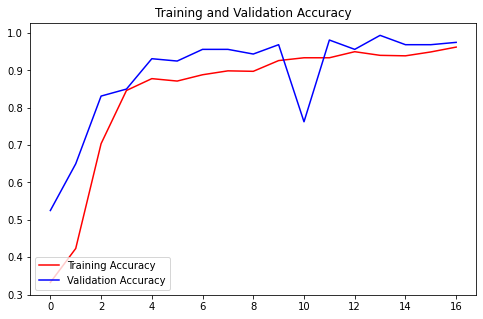

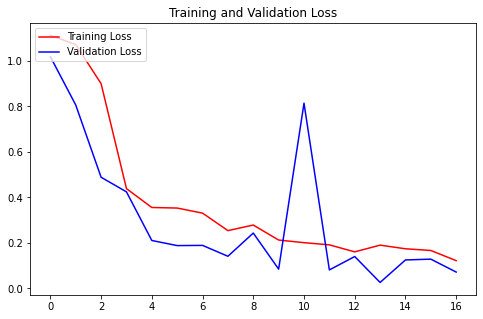

In [10]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(accuracy))

plt.figure(figsize=(8,5))
plt.plot(epochs_range, accuracy, 'r', label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc='lower left')
plt.show()

plt.figure(figsize=(8,5))
plt.plot(epochs_range, loss, 'r', label='Training Loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc='upper left')
plt.show()

Saving paper4.jpg to paper4.jpg
paper4.jpg
paper


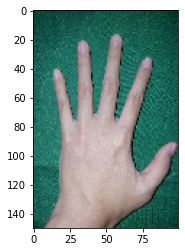

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0, 0]==1: #[0][0] [0,0]
    print('paper')
  elif classes[0, 1]==1:
    print('rock')
  else:
    print('scissors')